In [31]:
# -*- coding: utf-8 -*-

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

In [32]:
# machine learning
from sklearn.ensemble import RandomForestClassifier

# machine learning tools
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,recall_score,precision_score,f1_score, roc_curve
#from sklearn import grid_search
#from sklearn.grid_search import GridSearchCV

In [33]:
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [34]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

In [35]:
#combine is a list of dataset train and test. This will help cleansing all data
combine = [train, test]
#keep test PassengerID for the submission
p_id = test['PassengerId']

In [36]:
#Change odject to numbers
print(train['Sex'].value_counts(dropna=False))
print(test['Sex'].value_counts(dropna=False))

male      577
female    314
Name: Sex, dtype: int64
male      266
female    152
Name: Sex, dtype: int64


In [37]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female':1, 'male': 0}).astype(int)

# for dataset in combine:
#     dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [38]:
train['Sex'].value_counts(dropna=False)

0    577
1    314
Name: Sex, dtype: int64

In [39]:
print(train['Embarked'].value_counts(dropna=False))
print(test['Embarked'].value_counts(dropna=False))

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64
S    270
C    102
Q     46
Name: Embarked, dtype: int64


In [40]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    dataset['Embarked'] = dataset['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)

train['Embarked'].value_counts(dropna=False)

0    646
1    168
2     77
Name: Embarked, dtype: int64

In [41]:
#filling out the missing data points
print(train['Age'].describe())
print(test['Age'].describe())

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64
count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64


In [42]:
for dataset in combine:
    dataset['Age'].fillna(train.Age.mean(), inplace=True)

In [43]:
#Work on Name
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [44]:
print(train['Title'].value_counts(dropna=False))
print(test['Title'].value_counts(dropna=False))

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Capt          1
Mme           1
Don           1
Lady          1
Countess      1
Ms            1
Jonkheer      1
Sir           1
Name: Title, dtype: int64
Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dr          1
Ms          1
Dona        1
Name: Title, dtype: int64


In [45]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
for dataset in combine:
    dataset['Title'] = dataset['Title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5})
    dataset['Title'] = dataset['Title'].fillna(0)

train['Title'].value_counts(dropna=False)  

1    517
2    185
3    126
4     40
5     23
Name: Title, dtype: int64

In [46]:
for dataset in combine:
    dataset['ticket_str0'] = dataset['Ticket'].str[0]

print(train['ticket_str0'].value_counts(dropna=False))
print(test['ticket_str0'].value_counts(dropna=False))

3    301
2    183
1    146
P     65
S     65
C     47
A     29
W     13
4     10
7      9
F      7
6      6
L      4
5      3
8      2
9      1
Name: ticket_str0, dtype: int64
3    128
2     95
1     64
P     33
S     33
C     30
A     13
F      6
W      6
7      4
6      3
L      1
4      1
9      1
Name: ticket_str0, dtype: int64


In [47]:
for dataset in combine:
    dataset['ticket_str0'] = np.where(dataset['ticket_str0'].isin(['1','2','3','P','S','C','A']),dataset['ticket_str0'], 0)

a = train[['ticket_str0', 'Survived']].groupby(['ticket_str0'], as_index=False).mean().sort_values(by='Survived', ascending=False)
b = train[['ticket_str0', 'Survived']].groupby(['ticket_str0'], as_index=False).count().sort_values(by='Survived', ascending=False)

print(a)
print(b)

  ticket_str0  Survived
6           P  0.646154
1           1  0.630137
2           2  0.464481
5           C  0.340426
7           S  0.323077
3           3  0.239203
0           0  0.218182
4           A  0.068966
  ticket_str0  Survived
3           3       301
2           2       183
1           1       146
6           P        65
7           S        65
0           0        55
5           C        47
4           A        29


In [48]:
for dataset in combine:
    dataset['ticket_str0'].replace({'1':1,'2':2,'3':3,'0':0, 'P':1, 'C':3, 'S':3, 'A':0}, inplace = True)

print(train['ticket_str0'].value_counts(dropna=False))

3    413
1    211
2    183
0     84
Name: ticket_str0, dtype: int64


In [49]:
c = train[['ticket_str0', 'Survived']].groupby(['ticket_str0'], as_index=False).mean().sort_values(by='Survived', ascending=False)
print(c)

   ticket_str0  Survived
1            1  0.635071
2            2  0.464481
3            3  0.263923
0            0  0.166667


In [50]:
#Cabin
print(train['Cabin'].value_counts(dropna=False))
print(test['Cabin'].value_counts(dropna=False))

NaN            687
B96 B98          4
C23 C25 C27      4
G6               4
F2               3
D                3
E101             3
F33              3
C22 C26          3
B49              2
B77              2
B58 B60          2
C125             2
D36              2
E33              2
D26              2
C92              2
E8               2
D17              2
C126             2
F G73            2
C124             2
B35              2
C2               2
D35              2
C83              2
F4               2
E67              2
C52              2
C78              2
              ... 
C110             1
D47              1
C82              1
C30              1
B30              1
C54              1
D10 D12          1
A31              1
B39              1
B3               1
C49              1
B41              1
A19              1
B73              1
C118             1
D7               1
B19              1
E58              1
B4               1
D21              1
E49              1
A6          

In [51]:
for dataset in combine:
    dataset['cabin_str0'] = dataset['Cabin'].str[0]
    
a = train[['cabin_str0', 'Survived']].groupby(['cabin_str0'], as_index=False).mean().sort_values(by='Survived', ascending=False)
b = train[['cabin_str0', 'Survived']].groupby(['cabin_str0'], as_index=False).count().sort_values(by='Survived', ascending=False)

print(a)
print(b) 

  cabin_str0  Survived
3          D  0.757576
4          E  0.750000
1          B  0.744681
5          F  0.615385
2          C  0.593220
6          G  0.500000
0          A  0.466667
7          T  0.000000
  cabin_str0  Survived
2          C        59
1          B        47
3          D        33
4          E        32
0          A        15
5          F        13
6          G         4
7          T         1


In [52]:
for dataset in combine:
    dataset['cabin_str0'] = np.where(dataset['cabin_str0'].isin(['A','B','C','D','E','F']), dataset['cabin_str0'], 0)
    dataset['cabin_str0'].replace({'A':1, 'B':2, 'C':1, 'D':2, 'E':2, 'F':1, '0':0}, inplace = True)

train['cabin_str0'].value_counts(dropna=False)

0    692
2    112
1     87
Name: cabin_str0, dtype: int64

In [53]:
#family in the ship
for dataset in combine:
    dataset["FamilySize"] = dataset["SibSp"] + dataset["Parch"] + 1
    
print(train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean()\
      .sort_values(by='Survived', ascending=False))


   FamilySize  Survived
3           4  0.724138
2           3  0.578431
1           2  0.552795
6           7  0.333333
0           1  0.303538
4           5  0.200000
5           6  0.136364
7           8  0.000000
8          11  0.000000


In [54]:
 for dataset in combine:
    dataset["IsAlone"]=0
    dataset["IssmallFamily"]=0
    dataset["IslargeFamily"]=0 
    dataset.loc[dataset["FamilySize"]==1,"IsAlone"]=1
    dataset.loc[(dataset['FamilySize'] <= 4) & (dataset['FamilySize'] > 1),"IssmallFamily"]=1
    dataset.loc[dataset["FamilySize"]>4,"IslargeFamily"]=1

In [101]:
# # train = train.drop(['PassengerId','Name','Ticket', 'Cabin', 'FamilySize', 'SibSp','Parch'], axis=1)
# # test = test.drop(['PassengerId','Name','Ticket', 'Cabin', 'FamilySize', 'SibSp','Parch'],  axis=1)
train = train.drop(['PassengerId','Name','Ticket', 'Cabin'], axis=1)
test = test.drop(['PassengerId','Name','Ticket', 'Cabin'],  axis=1)

# print(train.info())
# print(test.info())

In [55]:
test['Fare'].fillna(train.Fare.mean(), inplace=True)

In [56]:
combine = [train, test]

# Analysis

In [109]:
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
#import prettyplotlib as ppl

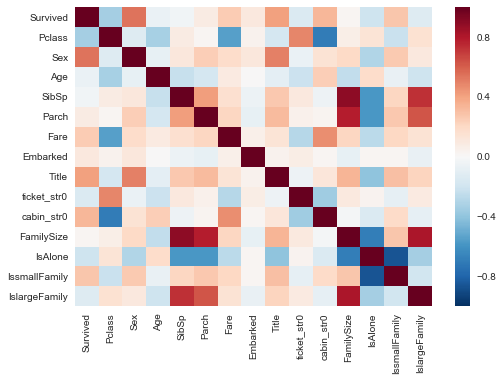

In [103]:
sns.heatmap(train.corr())

In [151]:
from scipy.stats import chi2_contingency

def chisq_of_df_cols(df, c1, c2):
    groupsizes = df.groupby([c1, c2]).size()
    #print(groupsizes)
    ctsum = groupsizes.unstack(c1)
    #print(ctsum)
    # fillna(0) is necessary to remove any NAs which will cause exceptions
    squared,p,dof,ef = chi2_contingency(ctsum.fillna(0))
    return(p)

In [157]:
ps={}
column_names = train.columns
column_names = column_names.drop('Survived')

for i in column_names:
    print(i)
    p = chisq_of_df_cols(train, i, 'Survived')
    ps.update({i:p})

ps

Pclass
Sex
Age
SibSp
Parch
Fare
Embarked
Title
ticket_str0
cabin_str0
FamilySize
IsAlone
IssmallFamily
IslargeFamily


{'Age': 0.03358316459333565,
 'Embarked': 2.3008626481449531e-06,
 'FamilySize': 3.579668975443533e-14,
 'Fare': 1.1647635739939964e-11,
 'IsAlone': 1.9726543846517183e-09,
 'IslargeFamily': 0.00031793943924433447,
 'IssmallFamily': 1.2299755327057432e-16,
 'Parch': 9.7035264210399973e-05,
 'Pclass': 4.5492517112987927e-23,
 'Sex': 1.1973570627755645e-58,
 'SibSp': 1.5585810465902116e-06,
 'Title': 3.9578613471597442e-61,
 'cabin_str0': 7.9094902798289595e-22,
 'ticket_str0': 3.1793624812169768e-22}

In [173]:
a = pd.DataFrame.from_dict(ps, orient='index')
print(a.sort_values(by=0, ascending=True))

                          0
Title          3.957861e-61
Sex            1.197357e-58
Pclass         4.549252e-23
ticket_str0    3.179362e-22
cabin_str0     7.909490e-22
IssmallFamily  1.229976e-16
FamilySize     3.579669e-14
Fare           1.164764e-11
IsAlone        1.972654e-09
SibSp          1.558581e-06
Embarked       2.300863e-06
Parch          9.703526e-05
IslargeFamily  3.179394e-04
Age            3.358316e-02


Set alpha < 0.05. All factors are less than the p value 0.05, thus factors has significant affect to the survival rate. The order is above.

### Embarked

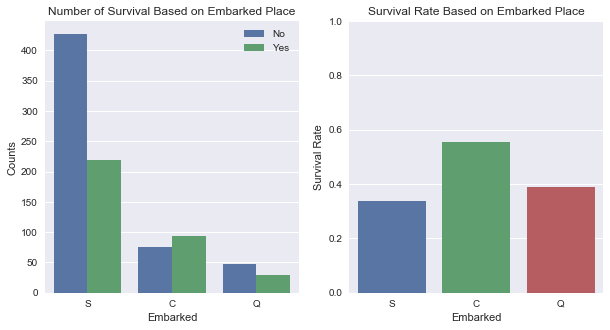

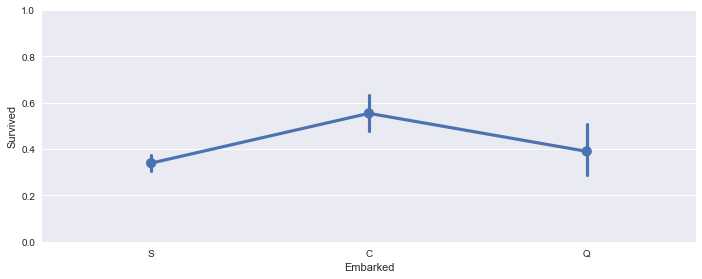

In [108]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
#sns.countplot(x = train['Embarked'])
sns.countplot(x=train['Embarked'], hue=train['Survived'])
plt.title("Number of Survival Based on Embarked Place")
plt.xlabel('Embarked')
plt.ylabel('Counts')
plt.xticks([0,1,2],['S','C','Q'])
#plt.yticks([100,200,300,400])
plt.legend(['No','Yes'])

plt.subplot(1,2,2)
survival_emb = train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()
sns.barplot(x=survival_emb['Embarked'], y=survival_emb['Survived'])
plt.title("Survival Rate Based on Embarked Place")
plt.xlabel('Embarked')
plt.ylabel('Survival Rate')
plt.xticks([0,1,2],['S','C','Q'])
plt.ylim(0.0,1.0)
plt.show()

sns.factorplot('Embarked', 'Survived', data=train, aspect = 2.5)
plt.xticks([0,1,2],['S','C','Q'])
plt.ylim(0.0,1.0)
plt.show()

Although, departing from Cherbourg has slightly higher survival rate than other, it seems not have huge impact on survival rate. We can test without embarked.

In [174]:
survival_age = train[['Age', 'Survived']].groupby(['Age'], as_index=False).mean()
print(survival_age[0:10])

    Age  Survived
0  0.42  1.000000
1  0.67  1.000000
2  0.75  1.000000
3  0.83  1.000000
4  0.92  1.000000
5  1.00  0.714286
6  2.00  0.300000
7  3.00  0.833333
8  4.00  0.700000
9  5.00  1.000000


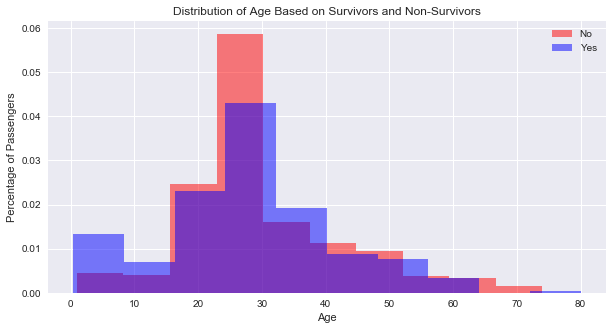

In [175]:
plt.figure(figsize=(10,5))
age_died = train.loc[train['Survived']==0, "Age"]
age_died.plot.hist(fc=(1, 0, 0, 0.5), normed=1, label="No")

age_survived = train.loc[train['Survived']==1, "Age"]
age_survived.plot.hist(fc=(0, 0, 1, 0.5), normed=1, label="Yes")

plt.title("Distribution of Age Based on Survivors and Non-Survivors")
plt.xlabel("Age")
plt.ylabel("Percentage of Passengers")
plt.legend(loc='upper right')

plt.show()

Age less than 18 has higher chance of surviving, and age between 18-30 has less chance of surviving. We can add a group child, adult to the factor to test.

In [ ]:
plt.figure(figsize=(10,5))
age_died = train.loc[train['Survived']==0, "Age"]
age_died.plot.hist(fc=(1, 0, 0, 0.5), normed=1, label="No")

age_survived = train.loc[train['Survived']==1, "Age"]
age_survived.plot.hist(fc=(0, 0, 1, 0.5), normed=1, label="Yes")

plt.title("Distribution of Age Based on Survivors and Non-Survivors")
plt.xlabel("Age")
plt.ylabel("Percentage of Passengers")
plt.legend(loc='upper right')

plt.show()
sns.FacetGrid(df, col='country', hue='country', col_wrap=4, )

## Feature Importance

In [77]:
pd.DataFrame(clf.feature_importances_, index=X.columns, columns=["Feature Importance"]).sort("Feature Importance", ascending=False)

/Users/mihoyamamoto/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Feature Importance
Sex,0.262839
Title,0.161237
Fare,0.149049
Age,0.119957
Pclass,0.083000
cabin_str0,0.065693
ticket_str0,0.041276
IslargeFamily,0.024210
Embarked,0.021370
IssmallFamily,0.021370
